In [1]:
import os
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from sklearn import svm
import PIL
import pickle
import cv2

In [2]:
data_dir = '../../data/v_0.1 + v_0.2/'
train_dataset = path.join(data_dir, 'train.csv')
valid_dataset = path.join(data_dir, 'valid.csv')
test_dataset = path.join(data_dir, 'test.csv')

train_df = pd.read_csv(train_dataset)
valid_df = pd.read_csv(valid_dataset)
test_df = pd.read_csv(test_dataset)

In [3]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, :1]
y = np.array(y['0'].tolist())

X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, :1]

X_valid = valid_df.iloc[:, 1:]
y_valid = valid_df.iloc[:, :1]

In [4]:
print('Train -', X.shape)
print('Valid -', X_valid.shape)
print('Test -', X_test.shape)

Train - (19670, 1024)
Valid - (7533, 1024)
Test - (8186, 1024)


In [6]:
def fit_and_score(k, X, y, X_test, y_test):
    clf = svm.SVC(kernel=k, gamma=0.01, C=0.7, max_iter=200, verbose=1)
    clf.fit(X, y)
    print(f'Train accuracy - {round(clf.score(X,y)*100, 2)}%')
    y_preds = clf.predict(X_test)
    y_test_list = y_test['0'].tolist()
    y_preds_list = list(y_preds)

    pred_acc_list = []
    for pred_class, true_class in zip(y_preds_list, y_test_list):
        pred_acc_list.append(int(pred_class==true_class))

    accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
    print(f'Test accuracy: {round(accuracy, 2)}%')
    return clf

In [7]:
clf = svm.SVC(kernel='rbf', gamma=0.01, C=0.7, max_iter=200, verbose=1)
clf.fit(X, y)

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.406494, rho = 0.030256
nSV = 177, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -17.639365, rho = -0.187192
nSV = 160, nBSV = 3
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -18.566035, rho = 0.030129
nSV = 179, nBSV = 3
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.259663, rho = 0.407272
nSV = 192, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.165425, rho = 0.479871
nSV = 183, nBSV = 4
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.248222, rho = 0.273831
nSV = 180, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.174888, rho = 0.386128
nSV = 194, nBSV = 2
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.388691, rho = 0.558416
nSV = 215,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.829530, rho = 0.358888
nSV = 199, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -17.560432, rho = 0.306972
nSV = 186, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -18.257410, rho = 0.299270
nSV = 190, nBSV = 1
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -16.273271, rho = 0.184790
nSV = 176, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -29.741175, rho = 0.508066
nSV = 205, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.988162, rho = 0.368412
nSV = 196, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.155873, rho = 0.746710
nSV = 228, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -28.270815, rho = 0.796971
nSV = 231, nBSV = 1

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.536635, rho = 0.183356
nSV = 203, nBSV = 3
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.878037, rho = 0.242323
nSV = 198, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.080070, rho = 0.241372
nSV = 219, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.860462, rho = 0.245874
nSV = 216, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.177466, rho = 0.567645
nSV = 226, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.660810, rho = 0.738519
nSV = 241, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.197704, rho = 0.744685
nSV = 237, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.132121, rho = 0.611721
nSV = 229, nBSV = 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.263001, rho = 0.712327
nSV = 212, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.204284, rho = 0.758193
nSV = 227, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -27.986950, rho = 0.574541
nSV = 212, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -27.698958, rho = 0.710934
nSV = 229, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.966417, rho = 0.730958
nSV = 222, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.673916, rho = 0.469783
nSV = 201, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.850931, rho = 0.377166
nSV = 201, nBSV = 9
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -24.139157, rho = 0.351816
nSV = 209, nBSV

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.830844, rho = 0.207449
nSV = 230, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.003700, rho = 0.182982
nSV = 218, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.974743, rho = 0.214180
nSV = 229, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.050048, rho = -0.168918
nSV = 183, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.866258, rho = 0.261495
nSV = 218, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -29.218496, rho = 0.490254
nSV = 233, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.565327, rho = 0.389767
nSV = 235, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -34.697989, rho = 0.602757
nSV = 242, nBSV 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.983377, rho = -0.118980
nSV = 257, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.668890, rho = 0.018657
nSV = 256, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.598213, rho = -0.438191
nSV = 229, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.272598, rho = -0.139464
nSV = 252, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -54.299730, rho = 0.492008
nSV = 287, nBSV = 35
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.838134, rho = 0.024540
nSV = 257, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -34.444993, rho = 0.010587
nSV = 254, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -57.586342, rho = -0.084935
nSV = 278,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.448332, rho = -0.190892
nSV = 258, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -44.724207, rho = -0.128721
nSV = 265, nBSV = 25
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.929245, rho = -0.031621
nSV = 281, nBSV = 37
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -69.910235, rho = 0.166063
nSV = 303, nBSV = 85
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.002163, rho = -0.051039
nSV = 263, nBSV = 23
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.750087, rho = -0.344739
nSV = 246, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.872609, rho = -0.215602
nSV = 257, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.543009, rho = -0.062940
nSV = 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.789248, rho = 0.089085
nSV = 225, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.869157, rho = -0.004719
nSV = 186, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.691219, rho = 0.399395
nSV = 254, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.122960, rho = 0.141182
nSV = 242, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.437838, rho = 0.554856
nSV = 271, nBSV = 40
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -51.477253, rho = 0.407295
nSV = 269, nBSV = 44
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.542052, rho = 0.496652
nSV = 254, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.640235, rho = 0.140362
nSV = 256, nB

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.741436, rho = -0.433027
nSV = 184, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.201013, rho = -0.900359
nSV = 192, nBSV = 27
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -44.303528, rho = 0.261000
nSV = 262, nBSV = 27
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.563351, rho = -0.117278
nSV = 235, nBSV = 24
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.920740, rho = -0.173349
nSV = 198, nBSV = 20
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.779301, rho = 0.319927
nSV = 260, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.787363, rho = 0.038784
nSV = 239, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.898316, rho = 0.381162
nSV = 265,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.588506, rho = -0.045479
nSV = 234, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.687029, rho = 0.500577
nSV = 271, nBSV = 33
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.064463, rho = 0.430285
nSV = 263, nBSV = 24
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.775468, rho = 0.307444
nSV = 256, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.449902, rho = 0.377269
nSV = 252, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.182907, rho = 0.049701
nSV = 241, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.415514, rho = -0.407735
nSV = 192, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -22.798623, rho = -0.561235
nSV = 194, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.152700, rho = 0.022378
nSV = 264, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.944333, rho = 0.026400
nSV = 261, nBSV = 9
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.591790, rho = -0.330817
nSV = 263, nBSV = 37
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.514352, rho = -0.106799
nSV = 256, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.498041, rho = 0.151249
nSV = 262, nBSV = 20
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.491953, rho = -0.095026
nSV = 250, nBSV = 9
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.906107, rho = -0.246049
nSV = 242, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.764302, rho = -0.233895
nSV = 241,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -27.850001, rho = -0.205764
nSV = 214, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -28.406841, rho = -0.189396
nSV = 228, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.258077, rho = -0.125714
nSV = 224, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -29.068743, rho = -0.128759
nSV = 237, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.482644, rho = -0.142940
nSV = 225, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.207735, rho = 0.415049
nSV = 253, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.995055, rho = 0.569867
nSV = 263, nBSV = 30
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -44.080580, rho = 0.632471
nSV = 26

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -19.325056, rho = -0.027093
nSV = 189, nBSV = 4
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -18.821069, rho = -0.056479
nSV = 186, nBSV = 3
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.345888, rho = 0.386823
nSV = 233, nBSV = 9
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.791444, rho = 0.541021
nSV = 241, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.313810, rho = 0.568478
nSV = 239, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.396330, rho = 0.422359
nSV = 231, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -24.246561, rho = 0.182018
nSV = 210, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.245555, rho = 0.334144
nSV = 221, nBSV

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.580895, rho = -0.670674
nSV = 301, nBSV = 92
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -75.748287, rho = -0.650108
nSV = 307, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -68.827096, rho = -0.549699
nSV = 300, nBSV = 93
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.758688, rho = -0.570827
nSV = 310, nBSV = 105
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -68.811345, rho = -0.591305
nSV = 296, nBSV = 92
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -82.659417, rho = 0.041165
nSV = 334, nBSV = 126
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.566264, rho = 0.281599
nSV = 326, nBSV = 115
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -84.582924, rho = 0.257420
nSV 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.114933, rho = 0.098784
nSV = 314, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.449277, rho = -0.357872
nSV = 310, nBSV = 105
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -57.032824, rho = -0.467066
nSV = 276, nBSV = 56
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -70.074985, rho = -0.397554
nSV = 290, nBSV = 87
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.536572, rho = -0.396948
nSV = 299, nBSV = 90
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -64.464204, rho = -0.313504
nSV = 293, nBSV = 74
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -72.309420, rho = -0.267902
nSV = 298, nBSV = 90
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -62.472220, rho = -0.372935
nSV 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.266435, rho = -0.303686
nSV = 324, nBSV = 118
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.742206, rho = -0.571131
nSV = 318, nBSV = 118
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -82.747425, rho = -0.300037
nSV = 319, nBSV = 107
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -95.936386, rho = -0.224951
nSV = 343, nBSV = 152
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -74.506789, rho = -0.429678
nSV = 308, nBSV = 96
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -64.342148, rho = -0.595861
nSV = 296, nBSV = 74
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -60.985171, rho = -0.546108
nSV = 287, nBSV = 65
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -68.797402, rho = -0.592066
n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -101.398161, rho = 0.136051
nSV = 338, nBSV = 157
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -76.280009, rho = -0.323250
nSV = 299, nBSV = 99
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -59.779878, rho = -0.687624
nSV = 271, nBSV = 78
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -91.870374, rho = -0.283094
nSV = 319, nBSV = 126
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -178.376094, rho = -0.030974
nSV = 400, nBSV = 380
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.905034, rho = -0.130426
nSV = 318, nBSV = 120
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.305631, rho = -0.307184
nSV = 310, nBSV = 108
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -75.521338, rho = -0.081060

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -49.866860, rho = -0.222151
nSV = 277, nBSV = 30
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.165406, rho = -0.406565
nSV = 269, nBSV = 37
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -55.296058, rho = -0.134656
nSV = 287, nBSV = 37
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -56.363276, rho = -0.105425
nSV = 287, nBSV = 47
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.064102, rho = -0.419915
nSV = 259, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -29.093062, rho = -0.728645
nSV = 229, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -47.390281, rho = -0.434251
nSV = 269, nBSV = 29
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -63.412332, rho = -0.241673
nSV =

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -55.997777, rho = -0.782516
nSV = 261, nBSV = 66
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -104.331440, rho = -0.317951
nSV = 334, nBSV = 157
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -94.190650, rho = 0.151858
nSV = 327, nBSV = 130
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.104179, rho = -0.029400
nSV = 310, nBSV = 111
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.729464, rho = 0.172477
nSV = 308, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -104.247640, rho = 0.329837
nSV = 334, nBSV = 146
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.164597, rho = -0.129705
nSV = 296, nBSV = 94
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -49.428570, rho = -0.557605
n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -54.361264, rho = -0.845310
nSV = 267, nBSV = 58
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -94.031009, rho = -0.424080
nSV = 325, nBSV = 139
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -93.551147, rho = 0.034304
nSV = 325, nBSV = 131
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -83.653642, rho = -0.146030
nSV = 312, nBSV = 112
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -83.538416, rho = 0.105703
nSV = 318, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -105.606708, rho = 0.217948
nSV = 336, nBSV = 159
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.396297, rho = -0.219150
nSV = 295, nBSV = 88
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.725838, rho = -0.649401
nS

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -121.863168, rho = -0.277657
nSV = 357, nBSV = 206
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -104.288681, rho = 0.102789
nSV = 349, nBSV = 170
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -103.886140, rho = 0.212862
nSV = 338, nBSV = 157
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -105.193024, rho = -0.408481
nSV = 335, nBSV = 164
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.018235, rho = -0.914981
nSV = 292, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.906862, rho = -0.216221
nSV = 310, nBSV = 115
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.871322, rho = 0.107498
nSV = 316, nBSV = 108
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -89.397345, rho = 0.01705

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -115.954252, rho = -0.037768
nSV = 364, nBSV = 211
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.207809, rho = -0.457212
nSV = 303, nBSV = 82
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -47.008190, rho = -0.796175
nSV = 252, nBSV = 45
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.384341, rho = -0.453377
nSV = 312, nBSV = 111
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -88.781494, rho = -0.126182
nSV = 330, nBSV = 132
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -72.323305, rho = -0.151921
nSV = 304, nBSV = 86
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.101339, rho = -0.447566
nSV = 302, nBSV = 90
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.777261, rho = -0.222885
n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -88.524445, rho = -0.307185
nSV = 318, nBSV = 120
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -62.511576, rho = -0.784522
nSV = 272, nBSV = 78
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -109.196712, rho = -0.394541
nSV = 344, nBSV = 179
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -75.673564, rho = 0.039787
nSV = 308, nBSV = 94
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -76.952282, rho = -0.015011
nSV = 311, nBSV = 101
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -137.397863, rho = -0.589588
nSV = 385, nBSV = 267
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -93.057808, rho = -0.051580
nSV = 327, nBSV = 141
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -97.625126, rho = 0.138952


WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -59.063399, rho = 0.389186
nSV = 280, nBSV = 71
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.856547, rho = 0.382220
nSV = 298, nBSV = 91
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -84.416415, rho = 0.143325
nSV = 305, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -126.797051, rho = 0.766494
nSV = 371, nBSV = 242
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -66.166184, rho = 0.502611
nSV = 294, nBSV = 77
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -82.553144, rho = 0.235895
nSV = 298, nBSV = 104
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.685006, rho = 0.029837
nSV = 308, nBSV = 125
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -61.196482, rho = 0.047726
nSV = 27

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.613486, rho = -0.290521
nSV = 315, nBSV = 128
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.197120, rho = -0.127693
nSV = 296, nBSV = 92
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.457793, rho = -0.196487
nSV = 303, nBSV = 108
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -77.739490, rho = -0.141925
nSV = 303, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -84.311359, rho = -0.109573
nSV = 311, nBSV = 112
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -77.330214, rho = -0.164014
nSV = 302, nBSV = 105
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.293403, rho = 0.481800
nSV = 280, nBSV = 32
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -59.356429, rho = 0.677893
nS

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -78.774531, rho = 0.413671
nSV = 315, nBSV = 110
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -54.571547, rho = -0.006232
nSV = 284, nBSV = 41
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -61.910760, rho = 0.258742
nSV = 293, nBSV = 61
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -56.715846, rho = 0.215603
nSV = 285, nBSV = 55
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.901887, rho = -0.114599
nSV = 257, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.364675, rho = 0.037565
nSV = 310, nBSV = 113
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -56.107280, rho = 0.343070
nSV = 277, nBSV = 49
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.087647, rho = 0.013155
nSV = 273

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.925362, rho = 0.935030
nSV = 253, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.072453, rho = 0.854620
nSV = 246, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.056668, rho = 0.793531
nSV = 257, nBSV = 31
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.662312, rho = 0.775965
nSV = 256, nBSV = 42
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.407188, rho = 0.466048
nSV = 236, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.237558, rho = -0.126029
nSV = 207, nBSV = 24
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.849323, rho = -0.200725
nSV = 184, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.448751, rho = -0.936759
nSV = 211, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -74.964535, rho = -0.703202
nSV = 306, nBSV = 98
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -75.923498, rho = -0.579265
nSV = 313, nBSV = 97
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -76.487057, rho = -0.548636
nSV = 315, nBSV = 95
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.138173, rho = -0.578042
nSV = 321, nBSV = 122
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.905429, rho = -0.594472
nSV = 307, nBSV = 94
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -66.882490, rho = -0.830650
nSV = 299, nBSV = 77
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -64.242150, rho = -0.728236
nSV = 289, nBSV = 75
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -64.149504, rho = -0.784660
nSV 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -72.442185, rho = -0.382333
nSV = 301, nBSV = 86
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -116.714600, rho = 0.015983
nSV = 359, nBSV = 207
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -71.384671, rho = -0.200373
nSV = 298, nBSV = 89
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -66.088104, rho = 0.049502
nSV = 298, nBSV = 64
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -89.223686, rho = 0.118246
nSV = 324, nBSV = 132
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -62.252589, rho = -0.249878
nSV = 287, nBSV = 72
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.868659, rho = -0.605904
nSV = 241, nBSV = 47
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.465575, rho = -0.318883
nSV =

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -92.470813, rho = -0.405611
nSV = 324, nBSV = 131
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -67.548313, rho = -0.497068
nSV = 296, nBSV = 75
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -69.883627, rho = -0.345040
nSV = 290, nBSV = 87
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -72.285190, rho = -0.380722
nSV = 295, nBSV = 88
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -67.079073, rho = -0.310568
nSV = 295, nBSV = 81
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -74.942711, rho = -0.277224
nSV = 299, nBSV = 94
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -65.524630, rho = -0.338885
nSV = 288, nBSV = 79
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -64.531448, rho = 0.279688
nSV =

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.325595, rho = 0.294759
nSV = 257, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.755905, rho = -0.012243
nSV = 308, nBSV = 116
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.858179, rho = 0.180815
nSV = 255, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.119140, rho = 0.415148
nSV = 251, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.381425, rho = 0.142903
nSV = 245, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.644906, rho = 0.050790
nSV = 251, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.071989, rho = 0.010122
nSV = 243, nBSV = 4
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -35.890534, rho = -0.046083
nSV = 250, n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -29.076031, rho = -0.076913
nSV = 205, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.832343, rho = -0.329008
nSV = 203, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.626974, rho = -0.519522
nSV = 190, nBSV = 9
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -132.077785, rho = 0.457981
nSV = 367, nBSV = 237
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.824373, rho = 0.269573
nSV = 309, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.619028, rho = 0.228646
nSV = 302, nBSV = 105
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -90.094456, rho = 0.156939
nSV = 314, nBSV = 121
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -69.372650, rho = -0.113694
nSV =

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -65.674950, rho = 0.148827
nSV = 292, nBSV = 69
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -79.682570, rho = 0.103070
nSV = 307, nBSV = 101
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -89.370688, rho = -0.177287
nSV = 321, nBSV = 125
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -86.751983, rho = 0.141561
nSV = 314, nBSV = 120
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -86.888251, rho = 0.326562
nSV = 319, nBSV = 122
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -94.439924, rho = -0.210880
nSV = 322, nBSV = 132
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -89.382634, rho = -0.443434
nSV = 316, nBSV = 127
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.048833, rho = -0.199176
nSV

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.307064, rho = 0.015501
nSV = 248, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -88.711504, rho = 0.287297
nSV = 335, nBSV = 137
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -53.448756, rho = 0.476101
nSV = 272, nBSV = 38
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -66.414406, rho = 0.162489
nSV = 292, nBSV = 71
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.973599, rho = -0.052736
nSV = 276, nBSV = 30
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -82.896599, rho = -0.186491
nSV = 319, nBSV = 123
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.991285, rho = -0.109737
nSV = 264, nBSV = 23
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -106.065980, rho = -0.688861
nSV = 3

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -76.076608, rho = -0.233666
nSV = 294, nBSV = 95
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.001086, rho = -0.855674
nSV = 283, nBSV = 93
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -118.186087, rho = -0.173369
nSV = 345, nBSV = 186
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -82.015441, rho = 0.231469
nSV = 315, nBSV = 111
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.014118, rho = 0.017978
nSV = 305, nBSV = 102
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -94.150002, rho = 0.308190
nSV = 326, nBSV = 136
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -95.171432, rho = 0.450674
nSV = 331, nBSV = 145
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -84.105271, rho = -0.096474
nSV

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -62.287386, rho = 0.109088
nSV = 288, nBSV = 79
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -75.247136, rho = 0.064076
nSV = 295, nBSV = 95
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.447907, rho = 0.559499
nSV = 252, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.692578, rho = 0.710978
nSV = 265, nBSV = 19
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.754473, rho = 0.705720
nSV = 261, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.448777, rho = 0.553708
nSV = 256, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.779285, rho = 0.364360
nSV = 262, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.328451, rho = 0.521184
nSV = 260, nBSV

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.847736, rho = 0.844674
nSV = 272, nBSV = 33
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.868296, rho = 0.732276
nSV = 259, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -51.078272, rho = 0.652677
nSV = 275, nBSV = 31
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.334811, rho = 0.597681
nSV = 253, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -39.984566, rho = 0.334219
nSV = 255, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.640509, rho = -0.245504
nSV = 224, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.910337, rho = -0.346909
nSV = 195, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -23.483344, rho = -0.642186
nSV = 197, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.819272, rho = 0.802016
nSV = 300, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -58.334660, rho = 0.709548
nSV = 261, nBSV = 71
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -58.325062, rho = 0.646442
nSV = 269, nBSV = 77
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -51.020866, rho = 0.569563
nSV = 250, nBSV = 54
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.670835, rho = 0.691276
nSV = 257, nBSV = 54
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -55.270406, rho = 0.679797
nSV = 259, nBSV = 62
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.886300, rho = 0.852186
nSV = 234, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -32.246382, rho = 1.050876
nSV = 233, nB

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.249063, rho = 0.554109
nSV = 266, nBSV = 32
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.954237, rho = 0.240984
nSV = 252, nBSV = 26
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.110099, rho = -0.366051
nSV = 237, nBSV = 31
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.451315, rho = -0.427762
nSV = 212, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -28.582868, rho = -0.839512
nSV = 205, nBSV = 20
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.421673, rho = -0.235003
nSV = 309, nBSV = 109
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -74.186557, rho = 0.054962
nSV = 304, nBSV = 86
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -102.350661, rho = 0.146542
nSV = 3

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.255399, rho = 0.161100
nSV = 272, nBSV = 41
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.959315, rho = 0.383830
nSV = 278, nBSV = 34
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.527981, rho = 0.316282
nSV = 260, nBSV = 14
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.914331, rho = -0.031533
nSV = 277, nBSV = 36
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -47.475963, rho = 0.222780
nSV = 270, nBSV = 27
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.057914, rho = 0.433496
nSV = 252, nBSV = 20
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.334318, rho = 0.153793
nSV = 247, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.452949, rho = 0.051572
nSV = 250, n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.174494, rho = -0.685759
nSV = 310, nBSV = 112
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -69.615185, rho = -0.507393
nSV = 293, nBSV = 84
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.722149, rho = -0.563113
nSV = 309, nBSV = 119
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.680035, rho = -0.524310
nSV = 311, nBSV = 121
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -87.683292, rho = -0.459288
nSV = 315, nBSV = 124
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -85.554165, rho = -0.600601
nSV = 313, nBSV = 117
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -73.557379, rho = 0.163445
nSV = 312, nBSV = 100
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -80.395214, rho = 0.377717
n

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.164404, rho = 0.484202
nSV = 262, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.671400, rho = 0.177616
nSV = 263, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -30.859553, rho = -0.313005
nSV = 222, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -26.008343, rho = -0.465210
nSV = 204, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -20.996187, rho = -0.661721
nSV = 202, nBSV = 5
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -65.031779, rho = 0.611591
nSV = 267, nBSV = 85
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.594647, rho = 0.648666
nSV = 248, nBSV = 53
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -53.955271, rho = 0.616842
nSV = 256, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -48.597264, rho = 0.620300
nSV = 269, nBSV = 33
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.559358, rho = 0.633208
nSV = 276, nBSV = 29
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -65.111966, rho = 0.538794
nSV = 296, nBSV = 71
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.172034, rho = 0.551557
nSV = 277, nBSV = 41
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.077967, rho = 0.165301
nSV = 260, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.818618, rho = -0.433974
nSV = 233, nBSV = 35
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -36.284634, rho = -0.641656
nSV = 224, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -27.392862, rho = -0.885918
nSV = 221,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.846148, rho = -0.187912
nSV = 253, nBSV = 15
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.294062, rho = -0.256136
nSV = 249, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.034992, rho = -0.062192
nSV = 279, nBSV = 36
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -39.964064, rho = -0.103625
nSV = 261, nBSV = 12
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.296173, rho = 0.336639
nSV = 268, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -68.929818, rho = 0.485422
nSV = 301, nBSV = 82
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -54.412173, rho = 0.237554
nSV = 278, nBSV = 43
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -53.880010, rho = 0.381305
nSV = 282,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.876403, rho = -0.154303
nSV = 262, nBSV = 28
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -55.027384, rho = -0.309852
nSV = 279, nBSV = 41
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.061845, rho = -0.344183
nSV = 260, nBSV = 28
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -59.949615, rho = -0.074125
nSV = 287, nBSV = 57
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -55.888853, rho = -0.191290
nSV = 286, nBSV = 45
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -68.126506, rho = 0.508327
nSV = 304, nBSV = 80
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -58.040053, rho = 0.451345
nSV = 288, nBSV = 53
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -53.944560, rho = 0.242899
nSV = 28

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -61.687056, rho = -0.185899
nSV = 281, nBSV = 69
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -61.351640, rho = 0.229467
nSV = 287, nBSV = 62
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -111.417537, rho = 0.039844
nSV = 352, nBSV = 196
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.577499, rho = 0.601438
nSV = 253, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.151288, rho = 0.675931
nSV = 267, nBSV = 23
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.120701, rho = 0.488578
nSV = 272, nBSV = 34
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -39.619442, rho = 0.526292
nSV = 258, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.699380, rho = 0.222340
nSV = 251,

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -139.585546, rho = 0.089886
nSV = 379, nBSV = 266
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -39.624938, rho = 0.693340
nSV = 257, nBSV = 20
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.129043, rho = 0.932546
nSV = 274, nBSV = 44
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.614544, rho = 0.762685
nSV = 253, nBSV = 19
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -37.287393, rho = 0.667695
nSV = 253, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.450576, rho = 0.521268
nSV = 275, nBSV = 38
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.022001, rho = 0.626193
nSV = 268, nBSV = 32
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -35.976014, rho = 0.586761
nSV = 247, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.847828, rho = 0.564811
nSV = 258, nBSV = 21
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -45.788782, rho = 0.648535
nSV = 266, nBSV = 33
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -40.611497, rho = 0.336553
nSV = 261, nBSV = 19
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -39.102314, rho = -0.318418
nSV = 232, nBSV = 27
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -21.616190, rho = -0.326315
nSV = 211, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.183015, rho = -0.754203
nSV = 216, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.757063, rho = 0.667461
nSV = 256, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -51.304184, rho = 0.864856
nSV = 274, 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.240377, rho = -0.102676
nSV = 322, nBSV = 116
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.921746, rho = -0.462339
nSV = 279, nBSV = 32
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.106058, rho = -0.864248
nSV = 238, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -25.112792, rho = -0.864560
nSV = 227, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -19.778409, rho = -1.030371
nSV = 200, nBSV = 6
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -81.105579, rho = -0.141969
nSV = 328, nBSV = 120
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -52.064289, rho = -0.506517
nSV = 279, nBSV = 35
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -65.580953, rho = -0.275668
nSV 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -74.387526, rho = 0.015728
nSV = 311, nBSV = 94
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.086305, rho = -0.288892
nSV = 259, nBSV = 13
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -67.185150, rho = -0.207503
nSV = 302, nBSV = 71
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -57.955696, rho = 0.149526
nSV = 278, nBSV = 50
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -60.998254, rho = -0.204411
nSV = 288, nBSV = 59
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -58.885206, rho = -0.440519
nSV = 284, nBSV = 54
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -57.542888, rho = -0.411663
nSV = 282, nBSV = 55
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.457511, rho = -0.414447
nSV = 2

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -16.414954, rho = -0.766922
nSV = 200, nBSV = 3
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -51.294162, rho = -0.294197
nSV = 263, nBSV = 35
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.194425, rho = -0.460239
nSV = 254, nBSV = 19
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -46.330140, rho = -0.483361
nSV = 256, nBSV = 22
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -41.395307, rho = -0.491692
nSV = 249, nBSV = 16
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -38.014292, rho = -0.608386
nSV = 238, nBSV = 17
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -43.637598, rho = -0.460788
nSV = 250, nBSV = 18
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -42.457387, rho = -0.484661
nSV = 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -50.279289, rho = 0.154049
nSV = 269, nBSV = 37
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -33.548660, rho = 0.596533
nSV = 245, nBSV = 11
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -34.840689, rho = 0.587004
nSV = 248, nBSV = 10
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.718654, rho = 0.430405
nSV = 241, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.395372, rho = 0.519201
nSV = 242, nBSV = 8
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -31.469718, rho = 0.238539
nSV = 238, nBSV = 7
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -19.938529, rho = -0.248824
nSV = 188, nBSV = 2
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 200
obj = -17.840219, rho = -0.319051
nSV = 180, nBSV

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=0.7, gamma=0.01, max_iter=200, verbose=1)

In [8]:
print(f'Train accuracy - {round(clf.score(X,y)*100, 2)}%')

Train accuracy - 94.89%


In [9]:
y_preds = clf.predict(X_test)

In [10]:
y_test_list = y_test['0'].tolist()
y_preds_list = list(y_preds)

pred_acc_list = []
for pred_class, true_class in zip(y_preds_list, y_test_list):
    pred_acc_list.append(int(pred_class==true_class))

accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
print(f'Test accuracy: {round(accuracy, 2)}%')

Test accuracy: 62.72%


In [11]:
filename = 'model_v2.sav'
pickle.dump(clf, open(filename, 'wb'))

In [22]:
import sys
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = svm.SVC(kernel='rbf', gamma=0.01, C=0.7, max_iter=5, verbose=1)
clf.fit(X, y)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.savefig("warmstart_plots/pure_SGD:"+str(kwargs)+".png")
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.close()


#clf2 = fit_and_score('rbf', X, y, X_test, y_test)

NameError: name 'sys' is not defined

In [21]:
clf2.support_

array([    0,     2,     5, ..., 17231, 17232, 17233], dtype=int32)

In [10]:
clf3 = fit_and_score_and_score_and_score('poly', X, y, X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Train accuracy - 43.39%
Test accuracy: 29.84%


In [11]:
clf4 = fit_and_score('sigmoid', X, y, X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Train accuracy - 50.65%
Test accuracy: 37.64%


In [139]:
filename = 'new_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [7]:
y_true = pd.Series(y_test_list, name="Actual")
y_pred = pd.Series(y_preds_list, name="Predicted")

df_confusion = pd.crosstab(y_true, y_pred)
df_confusion.to_csv('c_matrix.csv')

# New

In [4]:
new = np.load('../../data/datasetgray.npy', allow_pickle=True)

50 - train
20 - valid
15 - test
15 - golden

In [12]:
new[0].shape

(2,)

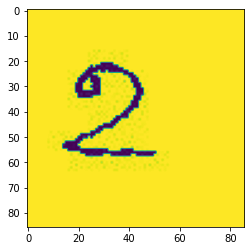

In [29]:
plt.imshow(new[90009][0])

In [18]:
len(new[0][1])

44

In [31]:
print(new[1][1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]


In [5]:
df_list = []

for i in range(91902):
    row = []
    label = (new[i][1].tolist().index(1)) + 1
    row.append(label)
    temp = np.reshape(new[i][0], (1, 7396))
    row += temp.tolist()[0]
    df_list.append(row)

In [6]:
dataset = pd.DataFrame(df_list)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,7387,7388,7389,7390,7391,7392,7393,7394,7395,7396
0,37,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,41,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,18,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,40,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,17,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [123]:
dataset.shape

(91902, 7397)

In [7]:
total_images = len(dataset)
train_images = round(0.5 * len(dataset))
valid_images = round(0.2 * len(dataset))
test_images = round(0.15 * len(dataset))
golden_images = total_images - (train_images + valid_images + test_images)

In [115]:
print(train_images, valid_images, test_images, golden_images)

45951 18380 13785 13786


In [8]:
train_list = []
for i in range(0, train_images):
    train_list.append(dataset.values[i])

valid_list = []
for i in range(train_images, train_images+valid_images):
    valid_list.append(dataset.values[i])

test_list = []
for i in range(train_images+valid_images, train_images+valid_images+test_images):
    test_list.append(dataset.values[i])

golden_list = []
for i in range(train_images+valid_images+test_images, train_images+valid_images+test_images+golden_images):
    golden_list.append(dataset.values[i])

In [10]:
train_df = pd.DataFrame(train_list)
valid_df = pd.DataFrame(valid_list)
test_df = pd.DataFrame(test_list)
golden_df = pd.DataFrame(golden_list)

In [126]:
print(f'Train - {train_df.shape}')
print(f'Valid - {valid_df.shape}')
print(f'Test - {test_df.shape}')
print(f'Golden - {golden_df.shape}')

Train - (45951, 7397)
Valid - (18380, 7397)
Test - (13785, 7397)
Golden - (13786, 7397)


In [ ]:
classes = dict()

for row in train_df.values:
    if row[0] not in classes:
        classes[row[0]] = 1
    else
        classes[row[0]] += 1

classes

In [11]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, :1]
y = np.array(y[0].tolist())

X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, :1]

In [130]:
clf = svm.SVC(kernel='rbf', C=1, max_iter=200, verbose=False)
clf.fit(X, y)
print(clf.score(X,y))

y_preds = clf.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=75).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.09684228852473287


In [131]:
y_test_list = y_test[0].tolist()
y_preds_list = list(y_preds)

pred_acc_list = []
for pred_class, true_class in zip(y_preds_list, y_test_list):
    pred_acc_list.append(int(pred_class==true_class))

accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
print(f'Accuracy: {round(accuracy, 2)}%')

Accuracy: 2.82%


In [ ]:
other_test_df = pd.read_csv('../../data/combined/test.csv')
temp_listother_test_df

for row in other_test_df.values:
    if row[0]==12:
        temp_list.append(row)

other_test_df_1 = pd.DataFrame(temp_list)

X_test = other_test_df_1.iloc[:, 1:]
y_test = other_test_df_1.iloc[:, :1]